In [48]:
from sklearn.datasets import load_diabetes

# 데이터 로딩
diabetes = load_diabetes()

df_X = diabetes.data
df_y = diabetes.target

In [49]:
import numpy as np

# 읽어온 데이터를 np.array 타입으로 변환
df_X = np.array(df_X)
df_y = np.array(df_y)

In [50]:
from sklearn.model_selection import train_test_split

# 데이터를 train set과 test set으로 구분
X_train, X_test, y_train, y_test = train_test_split(df_X, df_y, test_size=0.2, random_state=250110)

In [51]:
# 데이터의 차원 확인
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((353, 10), (89, 10), (353,), (89,))

In [52]:
# 모델의 파라미터 초기화
W = np.random.rand(10)
b = np.random.rand()

# 모델 함수
def model(X, W, b):
    predictions = 0
    for i in range(10):
        predictions += X[:, i] * [i]
    predictions += b
    return predictions        

In [53]:
# Loss 계산을 위한 MSE 계산 함수
def MSE(truth, predictions):
    mse = ((truth - predictions) ** 2).mean()
    return mse

In [54]:
# Loss 함수
def loss(X, W, b, y):
    predictions = model(X, W, b)
    L = MSE(y, predictions)
    return L

In [55]:
# 학습을 위한 gradient 계산
def gradient(X, W, b, y):
    N = len(y)
    
    y_pred = model(X, W, b)
    
    dW = 1/N * 2 * X.T.dot(y_pred - y)
    db = 2 * (y_pred - y).mean()
    
    return dW, db

In [56]:
# Learning Rate
learning_rate = 0.001

In [57]:
# 학습; gradient 계산 -> 가중치 업데이트 -> Loss 계산 과정 반복
losses = []
for i in range(1, 2001):
    dW, db = gradient(X_train, W, b, y_train)
    W -= learning_rate * dW
    b -= learning_rate * db
    L = loss(X_train, W, b, y_train)
    losses.append(L)
    
    if i % 100 == 0:
        print(f'Iteration {i}: Loss {L}')


Iteration 100: Loss 21891.286407358755
Iteration 200: Loss 16657.99112253264
Iteration 300: Loss 13151.41317176836
Iteration 400: Loss 10801.824957161292
Iteration 500: Loss 9227.479582344453
Iteration 600: Loss 8172.586923367753
Iteration 700: Loss 7465.754394900229
Iteration 800: Loss 6992.140118558182
Iteration 900: Loss 6674.794108405922
Iteration 1000: Loss 6462.155902190139
Iteration 1100: Loss 6319.677328972944
Iteration 1200: Loss 6224.209331065695
Iteration 1300: Loss 6160.240845007622
Iteration 1400: Loss 6117.378657696048
Iteration 1500: Loss 6088.658779919592
Iteration 1600: Loss 6069.414979469126
Iteration 1700: Loss 6056.520639922839
Iteration 1800: Loss 6047.88076690177
Iteration 1900: Loss 6042.091606041511
Iteration 2000: Loss 6038.212569464906


In [58]:
# Test set에 대한 예측 수행하고, mse 확인
prediction = model(X_test, W, b)
mse = loss(X_test, W, b, y_test)
mse

5039.827995038341

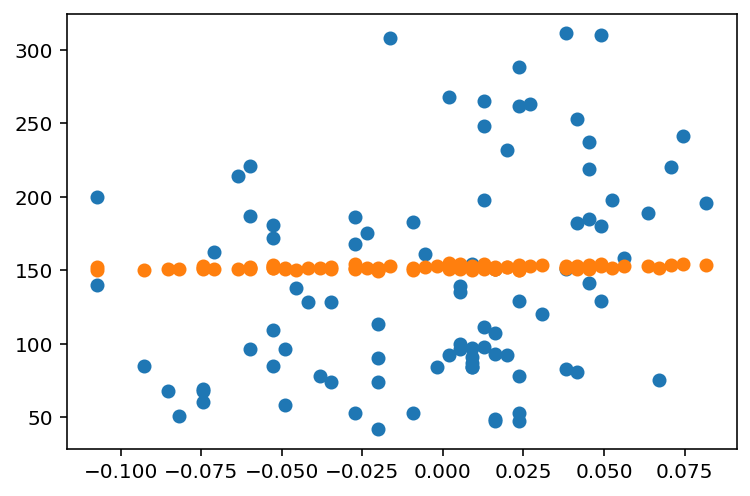

In [59]:
# 그래프로 표현
import matplotlib.pyplot as plt
%matplotlib inline 
%config InlineBackend.figure_format = 'retina'

plt.scatter(X_test[:, 0], y_test)
plt.scatter(X_test[:, 0], prediction)
plt.show()

In [60]:
# 가중치 값 확인
W

array([ 2.90886016,  0.9169499 ,  9.75797479,  6.82945508,  3.33313818,
        3.05625955, -5.73709703,  6.70715213,  9.0716658 ,  6.39714674])

In [61]:
b

151.834731071307

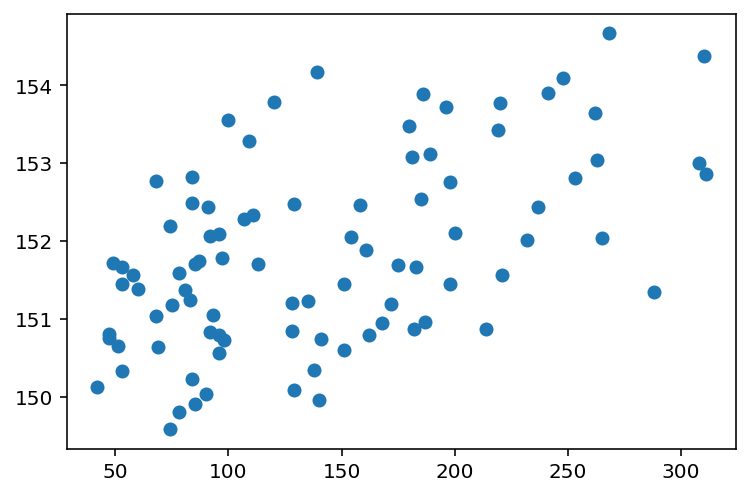

In [62]:
# truth와 예측값 간의 상관관계 시각화
plt.scatter(y_test, prediction)
plt.show()